## Penentuan Cluster Terbaik

Sum of Squared Errors (SSE) sangat penting untuk dijadikan dasar kita menentukan jumlah cluster yang paling optimal, namun lebih dari itu berguna untuk:
1. Semakin sedikit jumlah cluster yang dihasilkan maka semakin besar nilai SS. 
2. Begitu juga sebaliknya, semakin banyak jumlah cluster yang dihasilkan maka semakin kecil nilai SS nya. 
3. Karena sifatnya kuadratik, jika terdapat perbedaan yang cukup signifikan antara tiap kombinasi cluster maka perbedaan nilai SS akan semakin besar. 
4. Dan seiring bertambahnya jumlah cluster, perbedaan tiap SS ini akan semakin kecil yang selanjutnya grafik garis ini memiliki bentuk seperti siku tangan, dan untuk optimal jumlah cluster biasanya kita mengambil titik sikunya.

Disini kita akan menggunakan metrik elbow method yang akan dicari progressive nilai **tot.withinss** untuk tiap kombinasi jumlah cluster, dan disimpan dalam bentuk vector di R. Untuk keperluan ini, kita akan gunakan sapply. Function sapply akan digunakan untuk memanggil function kmeans untuk suatu range jumlah cluster. Range ini akan kita gunakan 1 sampai dengan 10.

```r
# Pembuatan perulangan dalam penentuan cluster terbaik
set.seed(100)
sse <- sapply(1:10,
			  function(param_k)
				{
				kmeans(pelanggan[field_yang_digunakan], param_k, nstart=25)$tot.withinss
				}
			  )
sse
```

Perhatikan parameter tersebut:
1. **sse**: Nama variable yang akan digunakan untuk menyimpan nilai tot.withinss dari tiap objek kmeans
2. **sapply**: Merupakan function yang digunakan untuk menghasilkan vector dari iterasi (looping) dari eksekusi fungsi tertentu (pada kasus ini: kmeans) dengan nilai range yang diberikan
3. **1:10**: Range jumlah cluster dari 1 sampai dengan 10
4. **param_k**: Parameter yang akan berisi nilai 1 sampai dengan 10, sesuai range di atas
5. **$tot.withinss**: Total penjumlahan dari tiap SS dari withinss

In [ ]:
# Silahkan coba disini
set.seed(100)
sse <- sapply(1:10,
              function(param_k)
                {
                kmeans(pelanggan[field_yang_digunakan], param_k, nstart=25)$tot.withinss
                }
              )
sse

[1] 10990.9740  3016.5612  1550.8725  1064.4187   829.9676   625.1462
 [7]   508.1568   431.6977   374.1095   317.9424

Disini kita akan memuat metrik elbow dengan berikut ini:

```r
# Pembuatan Elbow Matrix
jumlah_cluster_max <- 10
ssdata = data.frame(cluster=c(1:jumlah_cluster_max),sse)

# Proses Ploting
library(ggplot2)
ggplot(ssdata, aes(x=cluster, y=sse)) +
  # Buat garis elbow
  geom_line(color="red") + geom_point() +
  # Buat penamaan sumbu X dan y
  ylab("Within Cluster Sum of Squares") + xlab("Jumlah Cluster") +
  # Penampilan point data
  geom_text(aes(label=format(round(sse, 2), nsmall = 2)), hjust=-0.2, vjust=-0.5) + 
  # Scaling sumbu x yang mulai dari 1 sebagai cluster max
  scale_x_discrete(limits=c(1:jumlah_cluster_max))
```

Adapun hal yang perlu diperhatikan adalah:
1. Dengan memanfaatkan nilai Sum of Squares (SS) atau Sum of Squared Errors (SSE) kita bisa mengambil keputusan jumlah segmentasi optimal yang kita gunakan.
2. Setelah mendapatkan nilai SS dari tiap jumlah cluster, kita bisa plotting ke grafik garis dan menggunakan elbow method untuk menentukan jumlah cluster optimal.

Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”


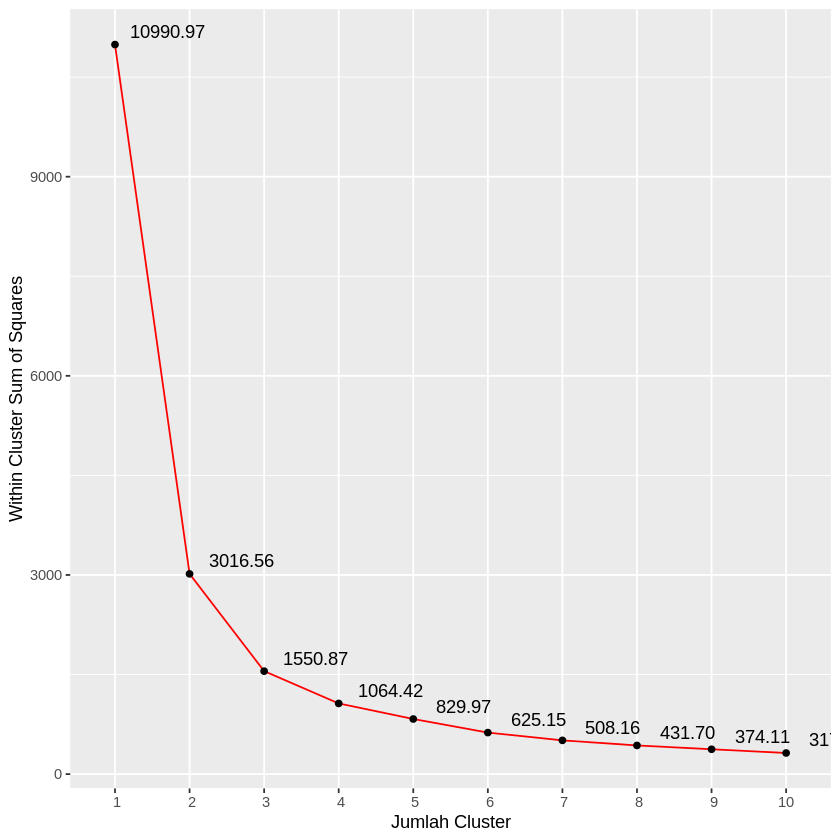

In [ ]:
# Pembuatan Elbow Matrix
jumlah_cluster_max <- 10
ssdata = data.frame(cluster=c(1:jumlah_cluster_max),sse)

# Proses Ploting
library(ggplot2)
ggplot(ssdata, aes(x=cluster, y=sse)) +
  # Buat garis elbow
  geom_line(color="red") + geom_point() +
  # Buat penamaan sumbu X dan y
  ylab("Within Cluster Sum of Squares") + xlab("Jumlah Cluster") +
  # Penampilan point data
  geom_text(aes(label=format(round(sse, 2), nsmall = 2)), hjust=-0.2, vjust=-0.5) + 
  # Scaling sumbu x yang mulai dari 1 sebagai cluster max
  scale_x_discrete(limits=c(1:jumlah_cluster_max))

In [ ]:
segmentasi$centers

,Jenis.Kelamin.1,Umur,Profesi.1,Tipe.Residen.1,NilaiBelanjaSetahun
1,1.40,61.80000,4.200000,1.400000,8.696132
2,1.75,31.58333,3.916667,1.250000,7.330958
3,2.00,20.07143,3.571429,1.357143,5.901089
4,2.00,42.33333,4.000000,1.555556,8.804791
5,1.70,52.50000,3.800000,1.300000,6.018321
